Text(0.5, 1.0, 'Logistic Function')

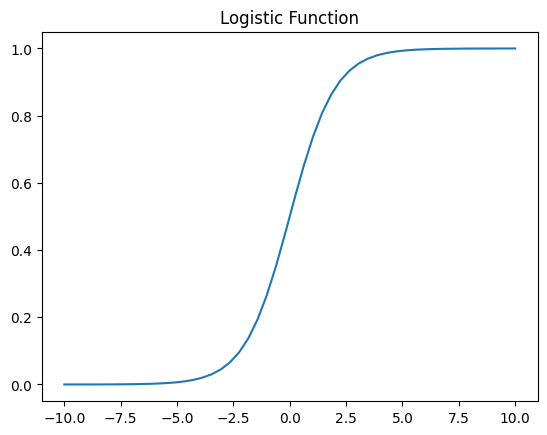

In [2]:
import numpy as np
import matplotlib.pyplot as plt
logistic_function = lambda x: np.exp(x)/(1+np.exp(x))

x = np.linspace(-10, 10)
plt.plot(x, logistic_function(x))
plt.title("Logistic Function")

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns = ["wine_class"])], axis = 1)
X, y = df.drop("wine_class", axis = "columns"), df["wine_class"]
# want to have somewhat larger test set for evaluation metrics later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# scaler = MinMaxScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier

# Eftersom KNN inte har en CV version så får vi använda GridSerachCV
# hade det funnits en KKNCV så hade vi kunnat om vi ville köra KNNCV och 
# LogisticRegressionCV var för sig,
from sklearn.model_selection import GridSearchCV

# Vi använder en pipline för att underlätta så vi slipper 
# köra en ny skalering varje gång.
from sklearn.pipeline import Pipeline 

# När vi kör logistic regression så behöver vi först en standard Scaler 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

import numpy as np

scaler = StandardScaler()

# Eftersom vi har multinomial output dvs har mer än två klasser så
# behöver vi en mer avancerad solver.
# multi_class "turneringen" mellan dom olika klasserna ser ut
# max_iter behöver vi om den inte convengerar
# penalty är regularisering
pipe_log = Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", multi_class = "ovr", max_iter=1000, penalty="elasticnet"   
))])

# Vi gör en scaler även på KNN för att vara konsikventa men igentligen behöver
# vi inte skalera KNN, men det gör ingen skada
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

param_grid_KNN = {"knn__n_neighbors": list(range(1,10))}


l1_ratio = np.linspace(0,1, 20)
param_grid_log = {"log__l1_ratio": l1_ratio}
# Notera at när vi kör en fit så körd den det 10 gånger
# och den delar upp setten i 5 och sen tar den medelvärdet av dom 5

# vanligt för gridserach om man har på stora dataset så kör man på bara en del av datan för gridsearch 
# är väldigt dyr
classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_grid_KNN, cv=5, scoring="accuracy")

classifier_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, cv=5, scoring="accuracy")

classifier_KNN.fit(X_train, y_train)
classifier_log.fit(X_train, y_train)

c:\Code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [10]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [11]:
classifier_log.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(l1_ratio=0.2631578947368421, max_iter=1000,
                                    multi_class='ovr', penalty='elasticnet',
                                    solver='saga'))])>

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



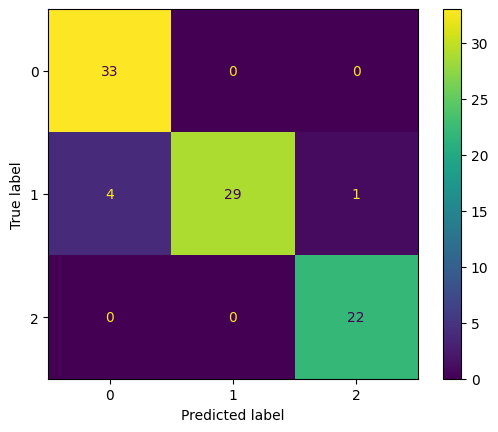

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

y_pred = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



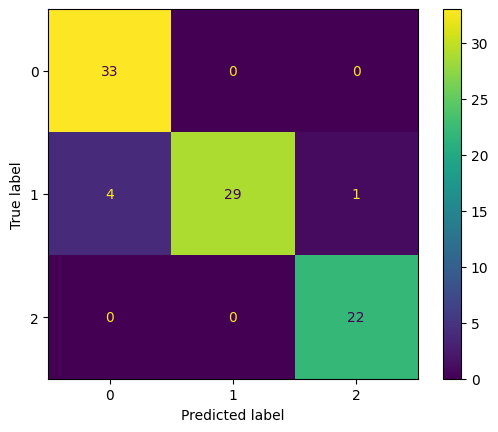

In [14]:
y_pred = classifier_log.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(cm).plot()